### DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

### Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

### Following actions should be performed:

#### If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
#### Check for null and unique values for test and train sets.
#### Apply label encoder.
#### Perform dimensionality reduction.
#### Predict your test_df values using XGBoost.

# If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Importing warnings to ignore them
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the files
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
# Checking shape of both the dataset
print("Shape of train dataset is",df_train.shape)
print("Shape of test dataset is",df_test.shape)

Shape of train dataset is (4209, 378)
Shape of test dataset is (4209, 377)


In [4]:
# Checking the head() of both the datasets
df_train.head()

ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...  X375  X376  X377  X378  X379  \
0   0  130.81   k  v  at  a  d  u  j  o  ...     0     0     1     0     0   
1   6   88.53   k  t  av  e  d  y  l  o  ...     1     0     0     0     0   
2   7   76.26  az  w   n  c  d  x  j  x  ...     0     0     0     0     0   
3   9   80.62  az  t   n  f  d  x  l  e  ...     0     0     0     0     0   
4  13   78.02  az  v   n  f  d  h  d  n  ...     0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 378 columns]

In [5]:
df_test.head()

ID  X0 X1  X2 X3 X4 X5 X6 X8  X10  ...  X375  X376  X377  X378  X379  X380  \
0   1  az  v   n  f  d  t  a  w    0  ...     0     0     0     1     0     0   
1   2   t  b  ai  a  d  b  g  y    0  ...     0     0     1     0     0     0   
2   3  az  v  as  f  d  a  j  j    0  ...     0     0     0     1     0     0   
3   4  az  l   n  f  d  z  l  n    0  ...     0     0     0     1     0     0   
4   5   w  s  as  c  d  y  i  m    0  ...     1     0     0     0     0     0   

   X382  X383  X384  X385  
0     0     0     0     0  
1     0     0     0     0  
2     0     0     0     0  
3     0     0     0     0  
4     0     0     0     0  

[5 rows x 377 columns]

In [6]:
# Checking the info() of both the datasets
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [8]:
# Dropping the irrelevant column from train and test
print("Shape of train data before dropping:", df_train.shape)
df_train.drop(columns='ID', inplace= True)
print("Shape of train data after dropping:", df_train.shape)
print("Shape of test data before dropping:", df_test.shape)
df_test.drop(columns='ID', inplace= True)
print("Shape of test data after dropping:", df_test.shape)
x_test_df = df_test

Shape of train data before dropping: (4209, 378)
Shape of train data after dropping: (4209, 377)
Shape of test data before dropping: (4209, 377)
Shape of test data after dropping: (4209, 376)


In [9]:
# Checking the variance of both the datasets and filtering the variables who has 0 variance
df_train.var()

y       160.766710
X10       0.013131
X11       0.000000
X12       0.069457
X13       0.054623
           ...    
X380      0.008015
X382      0.007547
X383      0.001661
X384      0.000475
X385      0.001424
Length: 369, dtype: float64

In [10]:
va = pd.DataFrame(df_train.var(), columns=['New'])

In [11]:
filt = (va['New'] == 0)
va[filt].index

Index(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347'],
      dtype='object')

In [12]:
# confirming the variance is equal to 0 or not
df_train[['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347']].var()

X11     0.0
X93     0.0
X107    0.0
X233    0.0
X235    0.0
X268    0.0
X289    0.0
X290    0.0
X293    0.0
X297    0.0
X330    0.0
X347    0.0
dtype: float64

In [13]:
# Dropping the variables with variance as 0
df_train.drop(columns = ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347'], inplace=True) 

In [14]:
df_train.shape

(4209, 365)

In [15]:
df_test.shape

(4209, 376)

In [16]:
va = pd.DataFrame(df_test.var(), columns=['New'])
filt = (va['New'] == 0)
va[filt].index

Index(['X257', 'X258', 'X295', 'X296', 'X369'], dtype='object')

In [17]:
# confirming the variance is equal to 0 or not
df_test[['X257', 'X258', 'X295', 'X296', 'X369']].var()

X257    0.0
X258    0.0
X295    0.0
X296    0.0
X369    0.0
dtype: float64

In [18]:
df_test.drop(columns = ['X257', 'X258', 'X295', 'X296', 'X369'], inplace= True)

In [19]:
df_test.shape

(4209, 371)

In [20]:
#Dropping the features from both the dataset to have equal features
train_cols = ['X257', 'X258', 'X295', 'X296', 'X369']
test_cols = ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347']
print('Shape of train and test before dropping', df_train.shape, df_test.shape)
df_train.drop(columns=train_cols, inplace= True)
df_test.drop(columns=test_cols, inplace= True)
print('Shape of train and test after dropping', df_train.shape, df_test.shape)

Shape of train and test before dropping (4209, 365) (4209, 371)
Shape of train and test after dropping (4209, 360) (4209, 359)


# Check for null and unique values for test and train sets.

In [21]:
df_train.isnull().sum().any()

False

In [22]:
df_test.isnull().sum().any()

False

In [85]:
for cols in df_train:
    print("Column Name:", cols)
    print("Unique Values in", cols, "Column are as follows:")
    print(df_train[cols].unique())
    print("Total number of unique values in", cols, "are:",len(df_train[cols].unique()))
    print("*-"*20)

Column Name: y
Unique Values in y Column are as follows:
[130.81  88.53  76.26 ...  85.71 108.77  87.48]
Total number of unique values in y are: 2545
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Column Name: X0
Unique Values in X0 Column are as follows:
[32 20 40  9 36 43 31 29 39 35 19 27 44 45  7  8 10 46 37 15 12 42  5  0
 26  6 25 13 24  1 22 14 30 38 21 18 23 41  4 16 34 33 17 11  3 28  2]
Total number of unique values in X0 are: 47
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Column Name: X1
Unique Values in X1 Column are as follows:
[23 21 24  3 19 13 20  1  4  0  6  9 26 11 16 22 17 15 10 25  5  7 14 12
  8 18  2]
Total number of unique values in X1 are: 27
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Column Name: X2
Unique Values in X2 Column are as follows:
[17 19 34 25 16 14 38  7  8 33  0 31  3 39 26 24  5 21  2 13 27 29 20 42
 22 12  9 28 41 18 40 11 43  6 36 10 30 37  4 32  1 23 35 15]
Total number of unique values in X2 are: 44
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Column Name: X

In [84]:
for cols in df_test:
    print("Column Name:", cols)
    print("Unique Values in", cols, "Column are as follows:")
    print(df_test[cols].unique())
    print("Total number of unique values in", cols, "are:",len(df_test[cols].unique()))
    print("*-"*20)

Column Name: X0
Unique Values in X0 Column are as follows:
[21 42 45 47 46 29 12 38 20  8 31 48  6 27 44  7 23 37 33 41  3 19 15 13
 17 36 34  0 28  5 32  4 22  9 18 14 40 11 43 35 26  1 16 25 30 10  2 39
 24]
Total number of unique values in X0 are: 49
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Column Name: X1
Unique Values in X1 Column are as follows:
[23  3 13 20  1 19  0 10 17  4 16 14 26  6  9 24  8 12 25 21 22  5 11 18
 15  7  2]
Total number of unique values in X1 are: 27
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Column Name: X2
Unique Values in X2 Column are as follows:
[34  8 17  4 38 24 26 10 33  0 16  6 37 32  9 23 14 13  2  5 22 29 30 27
 15 35 19 39 44 43 21 25 18 28 12 31 42  1 41 36  7  3 11 20 40]
Total number of unique values in X2 are: 45
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Column Name: X3
Unique Values in X3 Column are as follows:
[5 0 2 4 3 6 1]
Total number of unique values in X3 are: 7
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Column Name: X4
Unique Values in X4 

# Apply label encoder

In [25]:
# Importing LabbelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

In [26]:
# Assigning the function to a variable
le = LabelEncoder()

### Identifying where we need to apply the le in train dataset
Checking for Train dataset

In [27]:
import numpy as np
df_cat = list(df_train.select_dtypes(exclude=np.number))
df_cat

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [28]:
print("Before applying LabelEncoder to the train data")
df_train.info()

Before applying LabelEncoder to the train data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 360 entries, y to X385
dtypes: float64(1), int64(351), object(8)
memory usage: 11.6+ MB


In [29]:
for cols in df_train[df_cat]:
    df_train[cols] = le.fit_transform(df_train[cols])

In [30]:
df_train[df_cat]

X0  X1  X2  X3  X4  X5  X6  X8
0     32  23  17   0   3  24   9  14
1     32  21  19   4   3  28  11  14
2     20  24  34   2   3  27   9  23
3     20  21  34   5   3  27  11   4
4     20  23  34   5   3  12   3  13
...   ..  ..  ..  ..  ..  ..  ..  ..
4204   8  20  16   2   3   0   3  16
4205  31  16  40   3   3   0   7   7
4206   8  23  38   0   3   0   6   4
4207   9  19  25   5   3   0  11  20
4208  46  19   3   2   3   0   6  22

[4209 rows x 8 columns]

In [31]:
print("After applying LabelEncoder to the train data")
df_train.info()

After applying LabelEncoder to the train data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 360 entries, y to X385
dtypes: float64(1), int64(359)
memory usage: 11.6 MB


### Identifying where we need to apply the le test dataset
Checking for test dataset

In [32]:
df_cat = list(df_test.select_dtypes(exclude=np.number))
df_cat

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [33]:
df_test[df_cat]

X0  X1  X2 X3 X4  X5 X6 X8
0     az   v   n  f  d   t  a  w
1      t   b  ai  a  d   b  g  y
2     az   v  as  f  d   a  j  j
3     az   l   n  f  d   z  l  n
4      w   s  as  c  d   y  i  m
...   ..  ..  .. .. ..  .. .. ..
4204  aj   h  as  f  d  aa  j  e
4205   t  aa  ai  d  d  aa  j  y
4206   y   v  as  f  d  aa  d  w
4207  ak   v  as  a  d  aa  c  q
4208   t  aa  ai  c  d  aa  g  r

[4209 rows x 8 columns]

In [34]:
print("Before applying LabelEncoder to the test data")
df_test.info()

Before applying LabelEncoder to the test data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 359 entries, X0 to X385
dtypes: int64(351), object(8)
memory usage: 11.5+ MB


In [35]:
for cols in df_test[df_cat]:
    df_test[cols] = le.fit_transform(df_test[cols])

In [36]:
df_test[df_cat]

X0  X1  X2  X3  X4  X5  X6  X8
0     21  23  34   5   3  26   0  22
1     42   3   8   0   3   9   6  24
2     21  23  17   5   3   0   9   9
3     21  13  34   5   3  31  11  13
4     45  20  17   2   3  30   8  12
...   ..  ..  ..  ..  ..  ..  ..  ..
4204   6   9  17   5   3   1   9   4
4205  42   1   8   3   3   1   9  24
4206  47  23  17   5   3   1   3  22
4207   7  23  17   0   3   1   2  16
4208  42   1   8   2   3   1   6  17

[4209 rows x 8 columns]

In [37]:
print("After applying LabelEncoder to the test data")
df_test.info()

After applying LabelEncoder to the test data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 359 entries, X0 to X385
dtypes: int64(359)
memory usage: 11.5 MB


# Before Performing Dimensionality Reduction we need to standardize the data using the preprocessing method called as StandardScaler
# Performing PCA on train dataset

In [38]:
#Importing the standard scaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

In [39]:
#Assigning StandardScaler() function to a variable
sc = StandardScaler()

In [40]:
#Before applying the StandardScaler and transforming it the Standard Deviation of the dataset is as follows:
df_train.describe()

y           X0           X1           X2           X3  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean    100.669318    29.760751    11.113566    17.306486     2.919696   
std      12.679381    13.738338     8.531001    10.899914     1.739912   
min      72.110000     0.000000     0.000000     0.000000     0.000000   
25%      90.820000    19.000000     3.000000     8.000000     2.000000   
50%      99.150000    35.000000    13.000000    16.000000     2.000000   
75%     109.010000    43.000000    20.000000    25.000000     5.000000   
max     265.320000    46.000000    26.000000    43.000000     6.000000   

                X4           X5           X6           X8          X10  ...  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000  ...   
mean      2.997862    13.340223     6.807318    11.611309     0.013305  ...   
std       0.073900     8.250832     2.916973     7.037888     0.114590  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       3.000000     5.000000     6.000000     5.000000     0.000000  ...   
50%       3.000000    15.000000     7.000000    11.000000     0.000000  ...   
75%       3.000000    21.000000     9.000000    18.000000     0.000000  ...   
max       3.000000    28.000000    11.000000    24.000000     1.000000  ...   

              X375         X376         X377         X378         X379  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean      0.318841     0.057258     0.314802     0.020670     0.009503   
std       0.466082     0.232363     0.464492     0.142294     0.097033   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     1.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              X380         X382         X383         X384         X385  
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000  
mean      0.008078     0.007603     0.001663     0.000475     0.001426  
std       0.089524     0.086872     0.040752     0.021796     0.037734  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 360 columns]

In [41]:
#Now applying the StandardScaler to standardize the Standard Deviation
sc.fit(df_train)

StandardScaler()

In [42]:
# Converting the standardize data in a dataframe
scaled_data = pd.DataFrame(sc.fit_transform(df_train))

In [43]:
# Checking the dataset
scaled_data.head(2)

0         1         2         3         4         5         6    \
0  2.377424  0.163012  1.393488 -0.028122 -1.678270  0.028938  1.292117   
1 -0.957520  0.163012  1.159021  0.155388  0.620969  0.028938  1.776974   

        7         8         9    ...       350       351       352      353  \
0  0.751787  0.339445 -0.116122  ... -0.684167 -0.246447  1.475332 -0.14528   
1  1.437511  0.339445 -0.116122  ...  1.461630 -0.246447 -0.677814 -0.14528   

        354       355       356       357       358       359  
0 -0.097952 -0.090243 -0.087527 -0.040815 -0.021804 -0.037783  
1 -0.097952 -0.090243 -0.087527 -0.040815 -0.021804 -0.037783  

[2 rows x 360 columns]

In [44]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 360 entries, 0 to 359
dtypes: float64(360)
memory usage: 11.6 MB


In [45]:
#Now we can check whether the data is actually standardize
scaled_data.describe()

0             1             2             3             4    \
count  4.209000e+03  4.209000e+03  4.209000e+03  4.209000e+03  4.209000e+03   
mean  -5.022777e-16  5.011698e-18 -1.237151e-15 -5.151498e-16 -2.304590e-16   
std    1.000119e+00  1.000119e+00  1.000119e+00  1.000119e+00  1.000119e+00   
min   -2.252690e+00 -2.166513e+00 -1.302882e+00 -1.587952e+00 -1.678270e+00   
25%   -7.768903e-01 -7.833574e-01 -9.511815e-01 -8.539142e-01 -5.286503e-01   
50%   -1.198401e-01  3.814051e-01  2.211532e-01 -1.198763e-01 -5.286503e-01   
75%    6.578927e-01  9.637863e-01  1.041787e+00  7.059164e-01  1.195779e+00   
max    1.298725e+01  1.182179e+00  1.745188e+00  2.357502e+00  1.770589e+00   

                5             6             7             8             9    \
count  4.209000e+03  4.209000e+03  4.209000e+03  4.209000e+03  4.209000e+03   
mean   5.653970e-16  1.452865e-15 -7.443691e-17  7.280151e-18  1.410068e-16   
std    1.000119e+00  1.000119e+00  1.000119e+00  1.000119e+00  1.000119e+00   
min   -4.057130e+01 -1.617026e+00 -2.333970e+00 -1.650025e+00 -1.161216e-01   
25%    2.893816e-02 -1.010954e+00 -2.767985e-01 -9.394998e-01 -1.161216e-01   
50%    2.893816e-02  2.011887e-01  6.606344e-02 -8.687006e-02 -1.161216e-01   
75%    2.893816e-02  9.284744e-01  7.517872e-01  9.078647e-01 -1.161216e-01   
max    2.893816e-02  1.776974e+00  1.437511e+00  1.760494e+00  8.611662e+00   

       ...           350           351           352           353  \
count  ...  4.209000e+03  4.209000e+03  4.209000e+03  4.209000e+03   
mean   ...  6.054659e-16 -3.402389e-15 -5.202143e-16 -1.749610e-16   
std    ...  1.000119e+00  1.000119e+00  1.000119e+00  1.000119e+00   
min    ... -6.841675e-01 -2.464465e-01 -6.778137e-01 -1.452799e-01   
25%    ... -6.841675e-01 -2.464465e-01 -6.778137e-01 -1.452799e-01   
50%    ... -6.841675e-01 -2.464465e-01 -6.778137e-01 -1.452799e-01   
75%    ...  1.461630e+00 -2.464465e-01  1.475332e+00 -1.452799e-01   
max    ...  1.461630e+00  4.057675e+00  1.475332e+00  6.883263e+00   

                354           355           356           357           358  \
count  4.209000e+03  4.209000e+03  4.209000e+03  4.209000e+03  4.209000e+03   
mean   1.320457e-15  2.597510e-17  8.829557e-16  2.532095e-16  3.698633e-16   
std    1.000119e+00  1.000119e+00  1.000119e+00  1.000119e+00  1.000119e+00   
min   -9.795217e-02 -9.024252e-02 -8.752714e-02 -4.081511e-02 -2.180363e-02   
25%   -9.795217e-02 -9.024252e-02 -8.752714e-02 -4.081511e-02 -2.180363e-02   
50%   -9.795217e-02 -9.024252e-02 -8.752714e-02 -4.081511e-02 -2.180363e-02   
75%   -9.795217e-02 -9.024252e-02 -8.752714e-02 -4.081511e-02 -2.180363e-02   
max    1.020906e+01  1.108125e+01  1.142503e+01  2.450073e+01  4.586393e+01   

                359  
count  4.209000e+03  
mean  -2.143655e-16  
std    1.000119e+00  
min   -3.778296e-02  
25%   -3.778296e-02  
50%   -3.778296e-02  
75%   -3.778296e-02  
max    2.646696e+01  

[8 rows x 360 columns]

# Performing PCA on train dataset

In [46]:
# Importing the PCA function & assinging the function to a variable
from sklearn.decomposition import PCA
pca = PCA()

In [47]:
#Fitting the scaled data in the pca
pca.fit(scaled_data)

PCA()

In [48]:
#Checking the Variance Ratio
vr = pca.explained_variance_ratio_
vr.shape

(360,)

In [49]:
c_var = np.cumsum(vr)

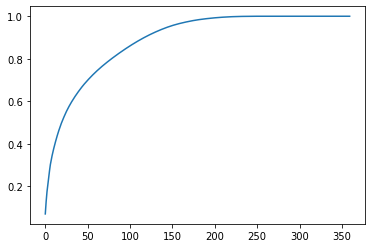

In [50]:
plt.plot(c_var)

In [51]:
pca = PCA(n_components=200)

In [52]:
pca.fit(scaled_data)

PCA(n_components=200)

In [53]:
x_pca_train = pca.fit_transform(scaled_data)

In [54]:
x_pca_train.shape

(4209, 200)

In [55]:
x_pca_traindf = pd.DataFrame(x_pca_train)
x_pca_traindf.describe()

0             1             2             3             4    \
count  4.209000e+03  4.209000e+03  4.209000e+03  4.209000e+03  4.209000e+03   
mean   5.476995e-16 -1.798408e-16  6.303266e-16  6.678747e-16 -5.062343e-16   
std    5.010776e+00  4.566830e+00  4.073377e+00  3.534914e+00  3.449615e+00   
min   -3.601963e+00 -7.515512e+00 -1.034789e+01 -1.299520e+01 -5.625990e+00   
25%   -2.015266e+00 -2.006750e+00 -2.819293e+00 -2.425195e+00 -2.125284e+00   
50%   -1.430050e+00 -4.620171e-01  1.217012e-01 -1.128473e-01 -5.741983e-01   
75%   -3.806958e-01  6.108383e-01  2.964577e+00  2.280537e+00  9.570304e-01   
max    3.021027e+01  2.173793e+01  1.725603e+01  2.460455e+01  2.658934e+01   

                5             6             7             8             9    \
count  4.209000e+03  4.209000e+03  4.209000e+03  4.209000e+03  4.209000e+03   
mean  -4.108669e-16 -8.067087e-16  1.692688e-15 -2.548844e-16 -5.737076e-17   
std    3.393936e+00  3.227301e+00  2.779139e+00  2.670970e+00  2.541635e+00   
min   -2.011024e+01 -8.848594e+00 -5.993475e+00 -1.934243e+01 -1.946496e+01   
25%   -1.183418e+00 -1.784176e+00 -1.982574e+00 -4.555322e-01 -1.026787e+00   
50%   -8.311918e-02 -6.904088e-03 -3.008684e-01  1.915527e-01 -5.027449e-02   
75%    9.743778e-01  1.721525e+00  2.040501e+00  6.545858e-01  1.038129e+00   
max    3.590150e+01  1.596558e+01  1.121654e+01  2.532765e+01  2.188417e+01   

       ...           190           191           192           193  \
count  ...  4.209000e+03  4.209000e+03  4.209000e+03  4.209000e+03   
mean   ... -2.463283e-15  2.396845e-15 -4.954195e-16 -2.939839e-16   
std    ...  4.086826e-01  4.043512e-01  4.014870e-01  3.937355e-01   
min    ... -2.139499e+00 -2.621611e+00 -3.980018e+00 -2.431909e+00   
25%    ... -2.123504e-01 -1.533937e-01 -1.619932e-01 -1.637592e-01   
50%    ... -9.155253e-03  1.477529e-02  5.129712e-03 -2.945088e-03   
75%    ...  1.927633e-01  1.883290e-01  1.719533e-01  1.669566e-01   
max    ...  3.000303e+00  2.976785e+00  5.703282e+00  2.595304e+00   

                194           195           196           197           198  \
count  4.209000e+03  4.209000e+03  4.209000e+03  4.209000e+03  4.209000e+03   
mean   1.880745e-15  4.348110e-15 -4.382717e-15 -2.097673e-15  9.037542e-16   
std    3.888437e-01  3.832139e-01  3.807000e-01  3.798491e-01  3.719821e-01   
min   -3.147801e+00 -5.506671e+00 -2.254911e+00 -2.456000e+00 -2.789065e+00   
25%   -1.703767e-01 -1.767955e-01 -1.989648e-01 -1.975147e-01 -1.578856e-01   
50%    5.583510e-04  2.054893e-02 -5.765519e-03  2.144573e-03  5.308724e-04   
75%    1.920755e-01  1.803014e-01  1.803008e-01  2.005564e-01  1.455034e-01   
max    3.178558e+00  6.658737e+00  2.582745e+00  3.239233e+00  3.513930e+00   

                199  
count  4.209000e+03  
mean   1.653448e-15  
std    3.661342e-01  
min   -3.562597e+00  
25%   -1.444308e-01  
50%   -9.850273e-03  
75%    1.293475e-01  
max    5.343837e+00  

[8 rows x 200 columns]

# Performing PCA on test dataset

In [56]:
sc = StandardScaler()
sc.fit(df_test)
df_test.describe()

X0           X1           X2           X3           X4  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean     30.515324    11.075315    17.780708     2.933476     2.997149   
std      15.221177     8.544520    10.227319     1.776977     0.078553   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      20.000000     3.000000    10.000000     2.000000     3.000000   
50%      36.000000    13.000000    17.000000     2.000000     3.000000   
75%      45.000000    20.000000    23.000000     5.000000     3.000000   
max      48.000000    26.000000    44.000000     6.000000     3.000000   

                X5           X6           X8          X10          X12  ...  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000  ...   
mean     15.023046     6.850558    11.558090     0.019007     0.074364  ...   
std       8.667149     2.868017     7.016379     0.136565     0.262394  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       6.000000     6.000000     5.000000     0.000000     0.000000  ...   
50%      17.000000     7.000000    11.000000     0.000000     0.000000  ...   
75%      23.000000     9.000000    18.000000     0.000000     0.000000  ...   
max      31.000000    11.000000    24.000000     1.000000     1.000000  ...   

              X375         X376         X377         X378         X379  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean      0.325968     0.049656     0.311951     0.019244     0.011879   
std       0.468791     0.217258     0.463345     0.137399     0.108356   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     1.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              X380         X382         X383         X384         X385  
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000  
mean      0.008078     0.008791     0.000475     0.000713     0.001663  
std       0.089524     0.093357     0.021796     0.026691     0.040752  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 359 columns]

In [57]:
scaled_test_df = pd.DataFrame(sc.fit_transform(df_test))
scaled_test_df.head(2)

0         1         2         3         4         5         6    \
0 -0.625211  1.395760  1.586068  1.163082  0.036299  1.266652 -2.388888   
1  0.754609 -0.945199 -0.956445 -1.651020  0.036299 -0.695011 -0.296602   

        7         8         9    ...      349       350       351       352  \
0  1.488396 -0.139195 -0.283441  ... -0.69542 -0.228583 -0.673338  7.138835   
1  1.773477 -0.139195 -0.283441  ... -0.69542 -0.228583  1.485138 -0.140079   

        353       354       355       356       357       358  
0 -0.109645 -0.090243 -0.094174 -0.021804 -0.026707 -0.040815  
1 -0.109645 -0.090243 -0.094174 -0.021804 -0.026707 -0.040815  

[2 rows x 359 columns]

In [58]:
scaled_test_df.describe()

0             1             2             3             4    \
count  4.209000e+03  4.209000e+03  4.209000e+03  4.209000e+03  4.209000e+03   
mean  -4.911464e-17  3.031444e-15 -8.469770e-17 -1.903390e-16 -7.715509e-16   
std    1.000119e+00  1.000119e+00  1.000119e+00  1.000119e+00  1.000119e+00   
min   -2.005032e+00 -1.296343e+00 -1.738757e+00 -1.651020e+00 -3.815900e+01   
25%   -6.909172e-01 -9.451993e-01 -7.608673e-01 -5.253793e-01  3.629870e-02   
50%    3.603747e-01  2.252805e-01 -7.634462e-02 -5.253793e-01  3.629870e-02   
75%    9.517264e-01  1.044616e+00  5.103891e-01  1.163082e+00  3.629870e-02   
max    1.148844e+00  1.746904e+00  2.563957e+00  1.725903e+00  3.629870e-02   

                5             6             7             8             9    \
count  4.209000e+03  4.209000e+03  4.209000e+03  4.209000e+03  4.209000e+03   
mean  -9.561581e-15 -2.663454e-16 -1.047445e-16  5.026074e-16  1.357379e-15   
std    1.000119e+00  1.000119e+00  1.000119e+00  1.000119e+00  1.000119e+00   
min   -1.733538e+00 -2.388888e+00 -1.647497e+00 -1.391947e-01 -2.834410e-01   
25%   -1.041186e+00 -2.966019e-01 -9.347940e-01 -1.391947e-01 -2.834410e-01   
50%    2.281245e-01  5.211246e-02 -7.955045e-02 -1.391947e-01 -2.834410e-01   
75%    9.204759e-01  7.495412e-01  9.182337e-01 -1.391947e-01 -2.834410e-01   
max    1.843611e+00  1.446970e+00  1.773477e+00  7.184184e+00  3.528071e+00   

       ...           349           350           351           352  \
count  ...  4.209000e+03  4.209000e+03  4.209000e+03  4.209000e+03   
mean   ...  4.283155e-16 -2.516888e-15  9.740631e-16 -5.382959e-16   
std    ...  1.000119e+00  1.000119e+00  1.000119e+00  1.000119e+00   
min    ... -6.954203e-01 -2.285826e-01 -6.733379e-01 -1.400789e-01   
25%    ... -6.954203e-01 -2.285826e-01 -6.733379e-01 -1.400789e-01   
50%    ... -6.954203e-01 -2.285826e-01 -6.733379e-01 -1.400789e-01   
75%    ...  1.437979e+00 -2.285826e-01  1.485138e+00 -1.400789e-01   
max    ...  1.437979e+00  4.374786e+00  1.485138e+00  7.138835e+00   

                353           354           355           356           357  \
count  4.209000e+03  4.209000e+03  4.209000e+03  4.209000e+03  4.209000e+03   
mean   1.409085e-15  2.986115e-16 -4.977605e-16  2.803913e-16 -5.448623e-16   
std    1.000119e+00  1.000119e+00  1.000119e+00  1.000119e+00  1.000119e+00   
min   -1.096454e-01 -9.024252e-02 -9.417350e-02 -2.180363e-02 -2.670705e-02   
25%   -1.096454e-01 -9.024252e-02 -9.417350e-02 -2.180363e-02 -2.670705e-02   
50%   -1.096454e-01 -9.024252e-02 -9.417350e-02 -2.180363e-02 -2.670705e-02   
75%   -1.096454e-01 -9.024252e-02 -9.417350e-02 -2.180363e-02 -2.670705e-02   
max    9.120307e+00  1.108125e+01  1.061870e+01  4.586393e+01  3.744329e+01   

                358  
count  4.209000e+03  
mean  -1.309174e-15  
std    1.000119e+00  
min   -4.081511e-02  
25%   -4.081511e-02  
50%   -4.081511e-02  
75%   -4.081511e-02  
max    2.450073e+01  

[8 rows x 359 columns]

In [59]:
pca = PCA()

In [60]:
pca.fit(scaled_test_df)

PCA()

In [61]:
vr_test = pca.explained_variance_ratio_
vr_test.shape

(359,)

In [62]:
c_var_test = np.cumsum(vr_test)

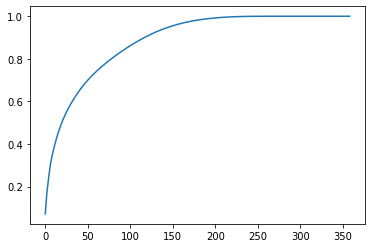

In [63]:
plt.plot(c_var_test)
plt.show()

In [64]:
pca = PCA(n_components=200)
pca.fit(scaled_test_df)

PCA(n_components=200)

In [65]:
x_pca_test = pca.fit_transform(scaled_test_df)
x_pca_test.shape

(4209, 200)

In [66]:
x_pca_testdf = pd.DataFrame(x_pca_test)
x_pca_testdf.describe()

0             1             2             3             4    \
count  4.209000e+03  4.209000e+03  4.209000e+03  4.209000e+03  4.209000e+03   
mean  -5.896922e-16  9.943209e-16 -7.069132e-18  2.554383e-16 -1.983577e-16   
std    5.065119e+00  4.500192e+00  4.157321e+00  3.544069e+00  3.429704e+00   
min   -3.401389e+00 -8.210115e+00 -1.008386e+01 -1.106351e+01 -4.762537e+00   
25%   -1.980901e+00 -2.229629e+00 -2.743671e+00 -2.482912e+00 -1.708065e+00   
50%   -1.426725e+00 -3.119974e-01 -4.188928e-02 -1.973282e-01 -8.607636e-01   
75%   -3.859954e-01  1.080075e+00  3.243229e+00  2.254495e+00  1.080596e+00   
max    2.999668e+01  2.221570e+01  1.701392e+01  2.215764e+01  3.328708e+01   

                5             6             7             8             9    \
count  4.209000e+03  4.209000e+03  4.209000e+03  4.209000e+03  4.209000e+03   
mean   1.096243e-15 -1.524770e-15  1.120932e-15  1.959178e-16  9.600303e-16   
std    3.378035e+00  3.188485e+00  2.775816e+00  2.623140e+00  2.503260e+00   
min   -2.187131e+01 -7.771325e+00 -6.160899e+00 -2.042623e+01 -7.868190e+00   
25%   -1.295172e+00 -1.543461e+00 -2.080118e+00 -6.280876e-01 -1.696227e+00   
50%    3.429235e-02  3.632593e-02  2.250096e-02  5.928375e-02 -2.422053e-02   
75%    1.305420e+00  1.451621e+00  1.881156e+00  9.044058e-01  1.366501e+00   
max    2.450774e+01  2.104979e+01  1.433897e+01  2.428984e+01  1.714946e+01   

       ...           190           191           192           193  \
count  ...  4.209000e+03  4.209000e+03  4.209000e+03  4.209000e+03   
mean   ... -1.764250e-16 -1.883330e-15  3.067423e-16 -4.233922e-15   
std    ...  4.136936e-01  4.088838e-01  4.024856e-01  3.959268e-01   
min    ... -1.942434e+00 -2.947137e+00 -2.476253e+00 -2.745418e+00   
25%    ... -2.250909e-01 -1.989625e-01 -1.979048e-01 -1.598072e-01   
50%    ... -1.746806e-02 -1.976896e-02  1.020907e-02  3.913628e-03   
75%    ...  1.915036e-01  1.976940e-01  1.719690e-01  1.730681e-01   
max    ...  4.077810e+00  2.947211e+00  2.817561e+00  6.792932e+00   

                194           195           196           197           198  \
count  4.209000e+03  4.209000e+03  4.209000e+03  4.209000e+03  4.209000e+03   
mean   2.599713e-15  1.832356e-15 -2.600148e-15 -1.120373e-15 -2.996138e-16   
std    3.932952e-01  3.888443e-01  3.828253e-01  3.772033e-01  3.675218e-01   
min   -4.351258e+00 -2.705619e+00 -2.999199e+00 -1.875001e+00 -3.573118e+00   
25%   -1.714436e-01 -1.872671e-01 -1.569964e-01 -1.912032e-01 -1.545568e-01   
50%    8.944449e-03  2.410716e-03 -1.155483e-02 -5.718439e-04 -1.264383e-02   
75%    1.806517e-01  1.812290e-01  1.485904e-01  1.914848e-01  1.374134e-01   
max    7.337203e+00  6.431906e+00  5.374849e+00  2.546845e+00  5.121100e+00   

                199  
count  4.209000e+03  
mean   6.912154e-16  
std    3.640236e-01  
min   -3.079434e+00  
25%   -1.873365e-01  
50%   -1.016434e-02  
75%    1.875391e-01  
max    3.139661e+00  

[8 rows x 200 columns]

# Predict your test_df values using XGBoo

In [67]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [68]:
xgbr = XGBRegressor(random_state = 1)

In [69]:
X = df_train.drop(columns= 'y')
Y = df_train['y']

In [70]:
X.shape

(4209, 359)

In [71]:
Y.shape

(4209,)

In [72]:
df_test.shape

(4209, 359)

In [73]:
#Splitting the dataset into train and test with test size of 25%
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.25, random_state= 1)

In [74]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3156, 359), (1053, 359), (3156,), (1053,))

In [75]:
#Training the model with the x_train, y_train
model = xgbr.fit(x_train, y_train)

In [76]:
#Predicting for x_test
y_pred = model.predict(x_test)
y_pred

array([ 74.4122  , 111.116264, 111.215065, ..., 107.12204 ,  95.2581  ,
       112.3808  ], dtype=float32)

In [77]:
y_test

3895     73.36
3619    117.59
385     107.74
1930     97.64
1301     76.18
         ...  
1999     89.65
702     108.68
1013    108.37
2106    108.31
2607    113.94
Name: y, Length: 1053, dtype: float64

In [78]:
#Checking the r2Score and MSE
from sklearn.metrics import r2_score, mean_squared_error

In [79]:
# Checking the score of splitted train data using the score method of XGBoost
xgbr.score(x_train, y_train)

0.8759619325081356

In [80]:
# Checking the score of splitted test data using the score method of XGBoost 
xgbr.score(x_test, y_test)

0.42632673223498285

In [81]:
print("Mean Squared Error is :", mean_squared_error(y_test, y_pred))

Mean Squared Error is : 88.64702725486583


In [82]:
print("R_square value of y_test & y_pred is :", r2_score(y_test, y_pred))

R_square value of y_test & y_pred is : 0.42632673223498285


In [83]:
# Predicting the test_df 
test_data_pred = model.predict(df_test)
test_data_pred = pd.DataFrame(test_data_pred, columns=['Predicted_Test_DF'])
test_data_pred

Predicted_Test_DF
0             87.240181
1            104.821800
2             86.204323
3             76.837257
4            110.354721
...                 ...
4204         107.648094
4205          93.910400
4206          94.962448
4207         109.153770
4208          91.059883

[4209 rows x 1 columns]